In [1]:
from models.FF_1H import *
import torch
from main import *
from torch.utils.data import DataLoader
from utils.Standard_Norm import *
torch.manual_seed(0)

In [2]:
large_training_raw = torch.from_numpy(np.load('data/large/YZ_Large_70.npz')['data'])
norm_scale = StandardNorm()
norm_scale.fit(large_training_raw)

In [6]:
train_tensor = norm_scale.transform(torch.from_numpy(np.load('data/large/YZ_Large_70.npz')['data']))
test_tensor = norm_scale.transform(torch.from_numpy(np.load('data/large/YZ_Large_30.npz')['data']))

In [15]:
np.load('data/large/scaled/YZ_Large_S_30.npz')['data']

array([[-0.09456645,  0.05061864,  0.08718904, ...,  0.        ,
         0.        ,  0.54761874],
       [-0.24649173,  1.23527353,  1.58741259, ...,  0.        ,
         0.        , -1.81905863],
       [-0.73133657, -1.06884965, -1.12554734, ...,  0.        ,
         0.        ,  1.09708534],
       ...,
       [-0.53287676, -1.00857974, -1.10337325, ...,  0.        ,
         0.        ,  0.34013897],
       [-0.48500291, -0.32775146, -0.27668915, ...,  0.        ,
         0.        ,  1.05538186],
       [-0.70583414, -0.84948069, -0.8618288 , ...,  0.        ,
         0.        ,  1.09361086]])

In [17]:
test_tensor.numpy()

array([[ -0.11644663,   0.03653322,   0.07714779, ..., -28.9946537 ,
        -30.9946537 ,   0.55101893],
       [ -0.26545055,   1.23084379,   1.60300263, ..., -28.9946537 ,
        -30.9946537 ,  -1.96497309],
       [ -0.74097237,  -1.09205946,  -1.15630817, ..., -28.9946537 ,
        -30.9946537 ,   1.1351516 ],
       ...,
       [ -0.54632872,  -1.0312983 ,  -1.13375524, ..., -28.9946537 ,
        -30.9946537 ,   0.33044917],
       [ -0.49937543,  -0.34492085,  -0.29294725, ..., -28.9946537 ,
        -30.9946537 ,   1.09081703],
       [ -0.71596032,  -0.87090249,  -0.88808401, ..., -28.9946537 ,
        -30.9946537 ,   1.13145791]])

In [26]:
# train_tensor = norm_scale.transform(torch.from_numpy(np.load('data/large/YZ_Large_70.npz')['data']))
# test_tensor = norm_scale.transform(torch.from_numpy(np.load('data/large/YZ_Large_30.npz')['data']))
train_loader = DataLoader(AntDataset('data/large/scaled_cost/YZ_Large_70_Cost_Scaled.npz'), batch_size=64, shuffle=True)
test_loader = DataLoader(AntDataset('data/large/scaled_cost/YZ_Large_30_Cost_Scaled.npz'), batch_size=64, shuffle=True)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleNN(2048, 1, 8, nn.ReLU).to(device)
lr = 1e-4
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = lr)
epoch = 100
train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, epoch, device)

Epoch 1 - Train Loss: 0.6683, Test Loss: 0.1878
Epoch 2 - Train Loss: 0.1469, Test Loss: 0.1184
Epoch 3 - Train Loss: 0.0959, Test Loss: 0.0696
Epoch 4 - Train Loss: 0.0797, Test Loss: 0.0620
Epoch 5 - Train Loss: 0.0656, Test Loss: 0.0894
Epoch 6 - Train Loss: 0.0581, Test Loss: 0.0437
Epoch 7 - Train Loss: 0.0548, Test Loss: 0.0364
Epoch 8 - Train Loss: 0.0533, Test Loss: 0.0792
Epoch 9 - Train Loss: 0.0526, Test Loss: 0.0316
Epoch 10 - Train Loss: 0.0481, Test Loss: 0.0376
Epoch 11 - Train Loss: 0.0456, Test Loss: 0.0303
Epoch 12 - Train Loss: 0.0461, Test Loss: 0.0555
Epoch 13 - Train Loss: 0.0427, Test Loss: 0.0287
Epoch 14 - Train Loss: 0.0460, Test Loss: 0.0325
Epoch 15 - Train Loss: 0.0385, Test Loss: 0.0779
Epoch 16 - Train Loss: 0.0435, Test Loss: 0.0262
Epoch 17 - Train Loss: 0.0407, Test Loss: 0.0356
Epoch 18 - Train Loss: 0.0392, Test Loss: 0.0457
Epoch 19 - Train Loss: 0.0377, Test Loss: 0.0262
Epoch 20 - Train Loss: 0.0375, Test Loss: 0.0300
Epoch 21 - Train Loss: 0.0365

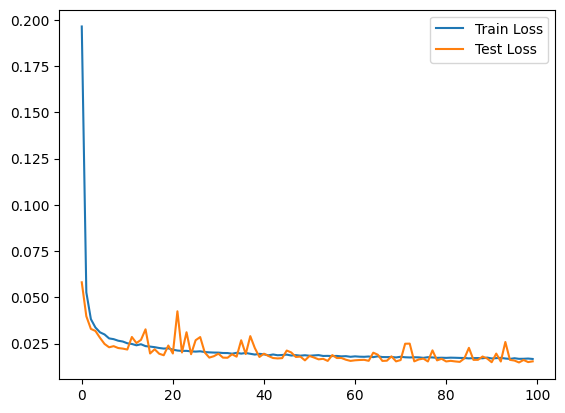

In [ ]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

In [27]:
# train_tensor = norm_scale.transform(torch.from_numpy(np.load('data/large/YZ_Large_70.npz')['data']))
# test_tensor = norm_scale.transform(torch.from_numpy(np.load('data/large/YZ_Large_30.npz')['data']))
train_loader = DataLoader(AntDataset('data/large/scaled_cost/YZ_Large_70_Cost_Scaled.npz'), batch_size=64, shuffle=True)
test_loader = DataLoader(AntDataset('data/large/scaled_cost/YZ_Large_30_Cost_Scaled.npz'), batch_size=64, shuffle=True)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = NN2(2048, 1, 8, 8, nn.ReLU).to(device)
lr = 1e-3
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = lr)
epoch = 100
train_loss, test_loss = train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, epoch, device)

Epoch 1 - Train Loss: 0.1117, Test Loss: 0.0358
Epoch 2 - Train Loss: 0.0360, Test Loss: 0.0485
Epoch 3 - Train Loss: 0.0286, Test Loss: 0.0185
Epoch 4 - Train Loss: 0.0277, Test Loss: 0.0467
Epoch 5 - Train Loss: 0.0233, Test Loss: 0.0303
Epoch 6 - Train Loss: 0.0211, Test Loss: 0.0181
Epoch 7 - Train Loss: 0.0210, Test Loss: 0.0155
Epoch 8 - Train Loss: 0.0190, Test Loss: 0.0259
Epoch 9 - Train Loss: 0.0194, Test Loss: 0.0240
Epoch 10 - Train Loss: 0.0177, Test Loss: 0.0157
Epoch 11 - Train Loss: 0.0170, Test Loss: 0.0235
Epoch 12 - Train Loss: 0.0167, Test Loss: 0.0136
Epoch 13 - Train Loss: 0.0164, Test Loss: 0.0134
Epoch 14 - Train Loss: 0.0160, Test Loss: 0.0125
Epoch 15 - Train Loss: 0.0152, Test Loss: 0.0155
Epoch 16 - Train Loss: 0.0150, Test Loss: 0.0128
Epoch 17 - Train Loss: 0.0140, Test Loss: 0.0226
Epoch 18 - Train Loss: 0.0154, Test Loss: 0.0149
Epoch 19 - Train Loss: 0.0147, Test Loss: 0.0112
Epoch 20 - Train Loss: 0.0144, Test Loss: 0.0138
Epoch 21 - Train Loss: 0.0140

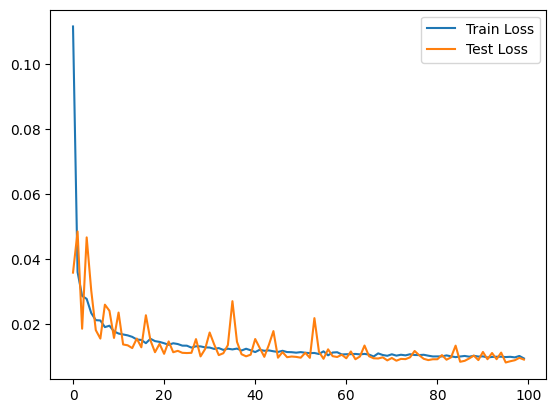

In [29]:
plt.plot(train_loss, label = 'Train Loss')
plt.plot(test_loss, label = 'Test Loss')
plt.legend()
plt.show()

In [2]:
def calculate_min_distance(ants, unit = 1):
    """
    Checks the smallest Euclidean distance, if it violates then return True
    """
    reshaped_tensor = torch.reshape(ants, (2, 1024))

# Transpose the reshaped tensor
    reshaped_tensor = torch.transpose(reshaped_tensor, 0, 1)
    nonzero_rows = torch.any(reshaped_tensor != 0, dim=1)
    filtered_tensor = reshaped_tensor[nonzero_rows]
    distances = torch.cdist(filtered_tensor, filtered_tensor)
    distances.fill_diagonal_(float('inf'))
    closest_neighbor_distances, _ = torch.min(distances, dim=1)
    smallest = torch.min(closest_neighbor_distances)
    return smallest.item()
    

In [3]:
def gradient_wrt_input(model, ants, lr, noise_std, iters):
    model.eval()
    last = None
    for i in range(iters):
        if ants.grad is not None:
            ants.requires_grad_()
            ants.grad.zero_()
        output = model(ants)
        output.backward()

        with torch.no_grad():
            last = ants.clone()
            noise = torch.rand_like(ants) * noise_std
            candidate = ants - (lr * ants.grad * (ants != 0).float())
            if calculate_min_distance(ants) < 0.5:
                continue
        ants.grad.zero_()
    return ants


In [4]:
import matplotlib.pyplot as plt
def show_arrays(inp):
    data = inp.cpu().detach().numpy()
    reshaped_data = np.reshape(data, (2,1024))
    x = reshaped_data[0]
    y = reshaped_data[1]

    nonzero_ind = np.nonzero((x != 0) | (y != 0))
    x = x[nonzero_ind]
    y = y[nonzero_ind]

    plt.scatter(x,y, s=0.75)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Antenna Array Pattern')
    plt.show()

In [240]:
given_shapes =  np.zeros((20, 2048))#pd.DataFrame(columns=[f'y{i + 1}' for i in range(1024)] + [f'z{i + 1}' for i in range(1024)])
optimized_shapes = np.zeros((20, 2048)) #pd.DataFrame(columns=[f'y{i + 1}' for i in range(1024)] + [f'z{i + 1}' for i in range(1024)])
given_shapes_True_cost = []
given_shapes_pred_cost = []
optimized_shapes_pred_cost = []

In [ ]:
deepset = 

True Cost: tensor([-0.1689], device='cuda:0')


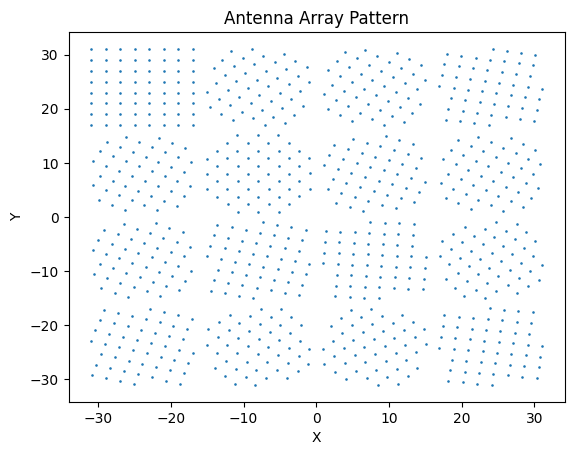

Pred Cost: tensor([[-0.2502]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8851126432418823
New Pred: tensor([[-1.6421]], device='cuda:0', grad_fn=<AddmmBackward0>)


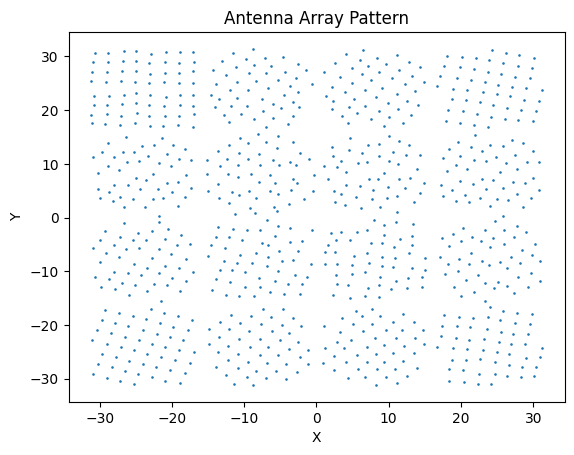

torch.Size([1, 2048])
0.9440081715583801
True Cost: tensor([1.0542], device='cuda:0')


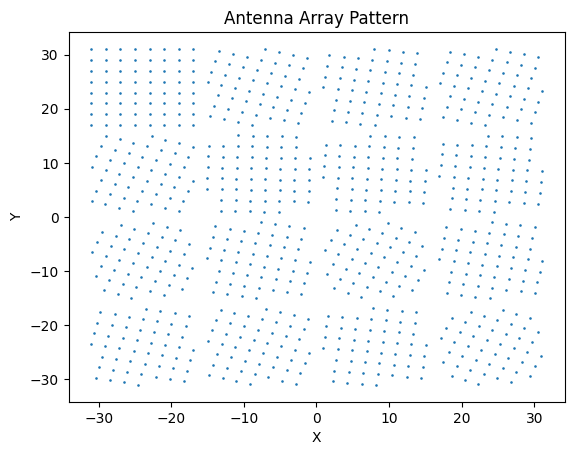

Pred Cost: tensor([[1.0372]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8918191194534302
New Pred: tensor([[1.0266]], device='cuda:0', grad_fn=<AddmmBackward0>)


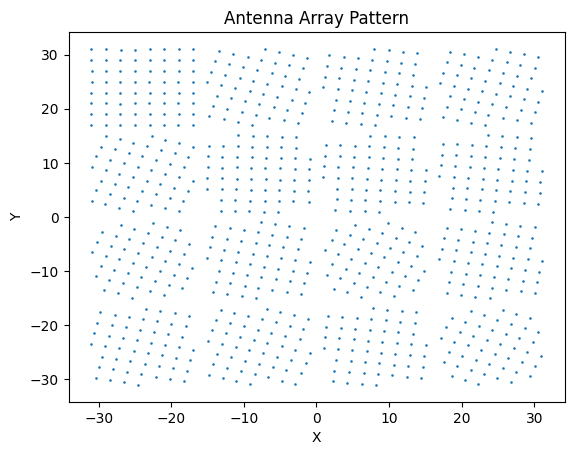

torch.Size([1, 2048])
1.7974354028701782
True Cost: tensor([-2.1010], device='cuda:0')


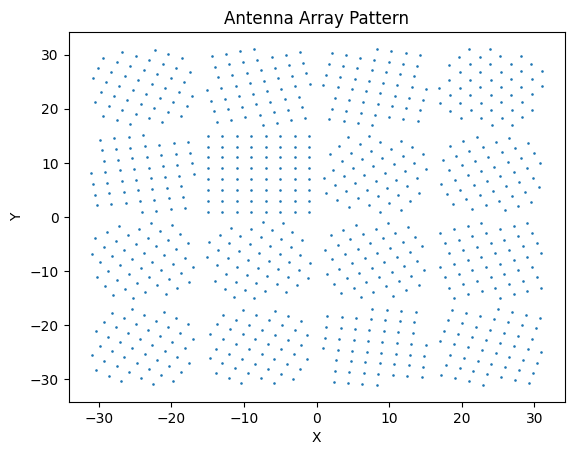

Pred Cost: tensor([[-1.9898]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8819856643676758
New Pred: tensor([[-2.6688]], device='cuda:0', grad_fn=<AddmmBackward0>)


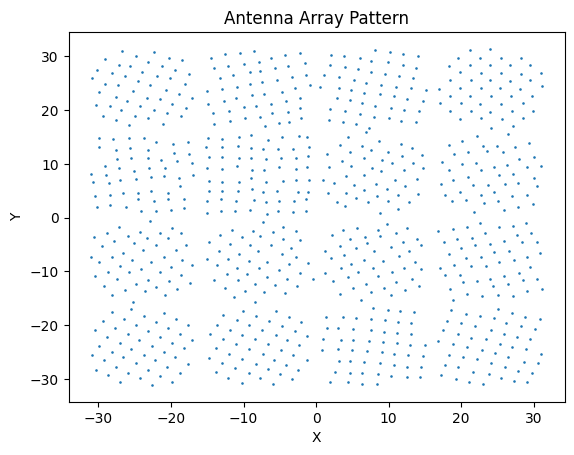

torch.Size([1, 2048])
0.8981317281723022
True Cost: tensor([0.5601], device='cuda:0')


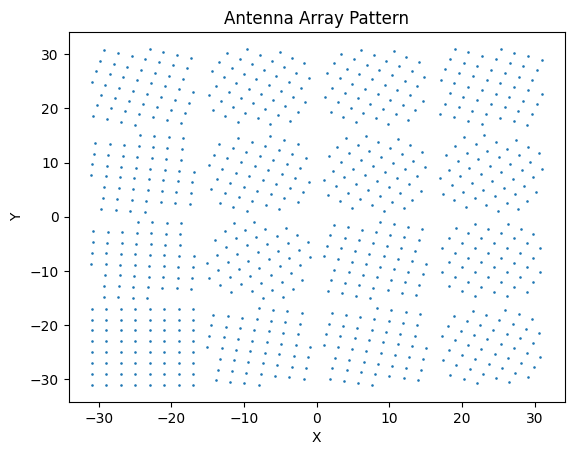

Pred Cost: tensor([[0.3863]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.891641616821289
Early stopped
New Pred: tensor([[-1.9932]], device='cuda:0', grad_fn=<AddmmBackward0>)


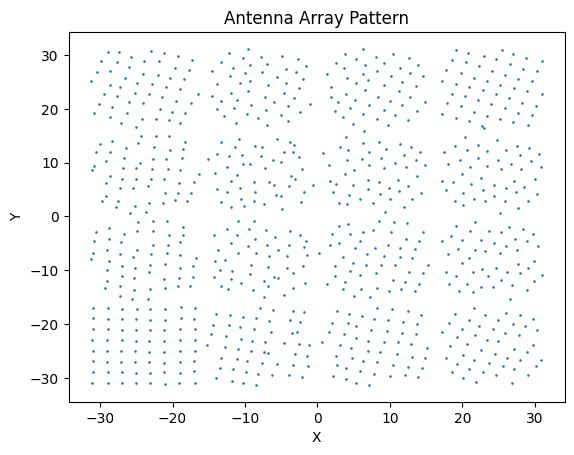

torch.Size([1, 2048])
0.5
True Cost: tensor([0.5010], device='cuda:0')


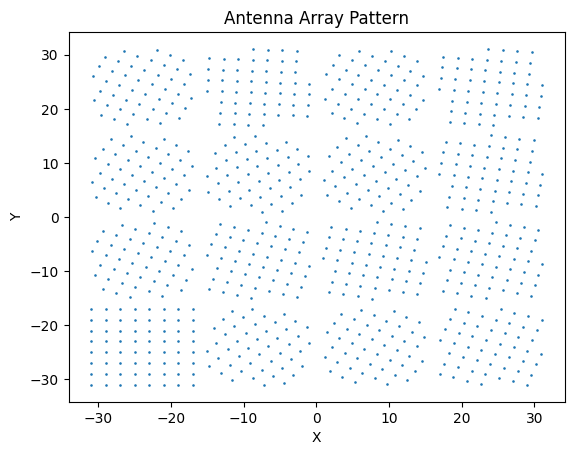

Pred Cost: tensor([[0.3535]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.890883207321167
New Pred: tensor([[-2.0644]], device='cuda:0', grad_fn=<AddmmBackward0>)


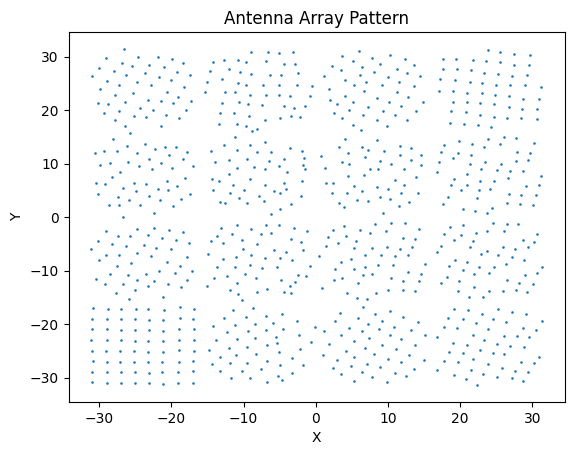

torch.Size([1, 2048])
0.696584165096283
True Cost: tensor([0.2232], device='cuda:0')


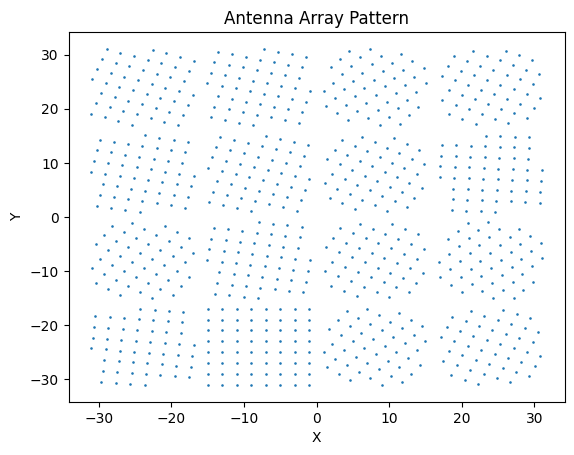

Pred Cost: tensor([[0.2861]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.9301302433013916
New Pred: tensor([[-2.3836]], device='cuda:0', grad_fn=<AddmmBackward0>)


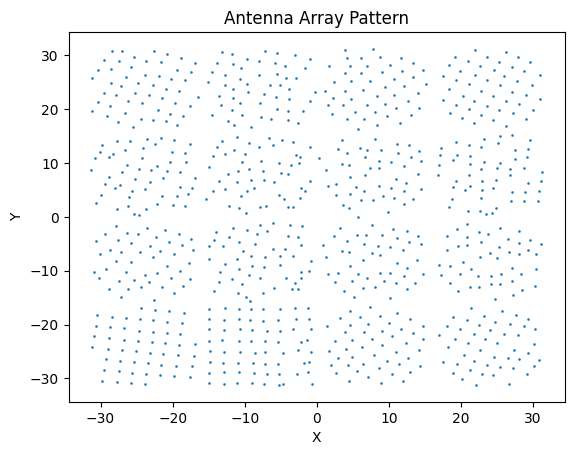

torch.Size([1, 2048])
0.5444141030311584
True Cost: tensor([0.8924], device='cuda:0')


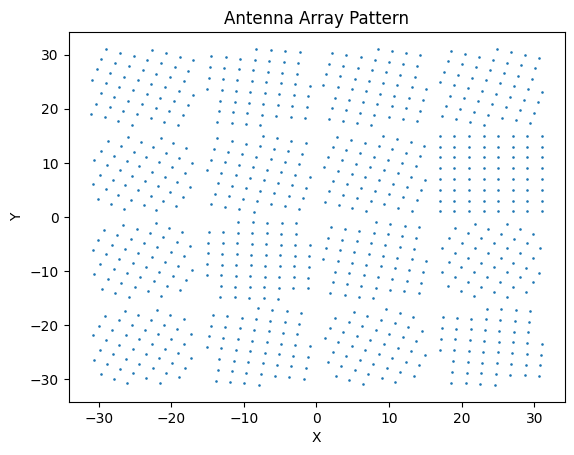

Pred Cost: tensor([[0.8895]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8824071884155273
New Pred: tensor([[0.7658]], device='cuda:0', grad_fn=<AddmmBackward0>)


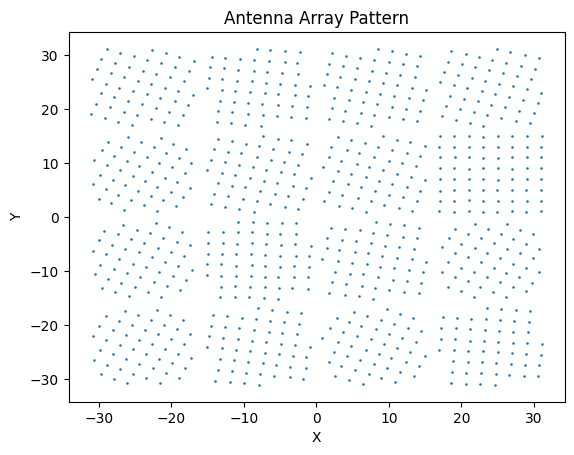

torch.Size([1, 2048])
1.6854506731033325
True Cost: tensor([1.1026], device='cuda:0')


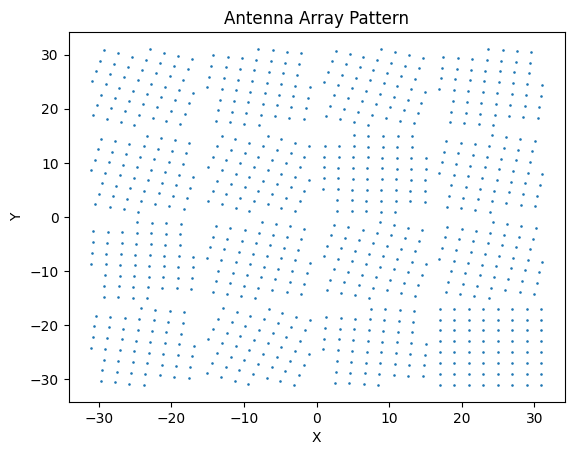

Pred Cost: tensor([[1.0768]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8814829587936401
New Pred: tensor([[1.0661]], device='cuda:0', grad_fn=<AddmmBackward0>)


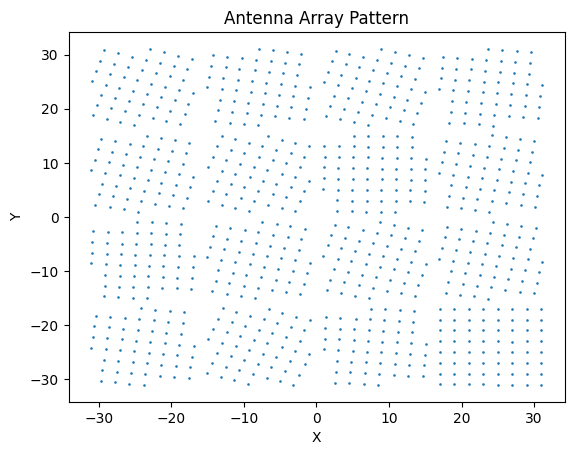

torch.Size([1, 2048])
1.8109166622161865
True Cost: tensor([0.3104], device='cuda:0')


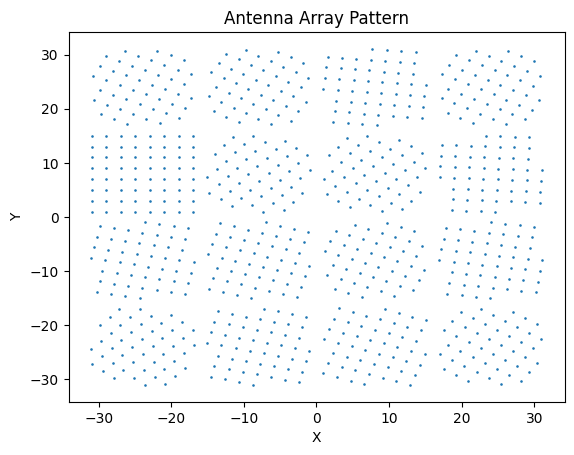

Pred Cost: tensor([[0.2713]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8772610425949097
Early stopped
New Pred: tensor([[-2.4834]], device='cuda:0', grad_fn=<AddmmBackward0>)


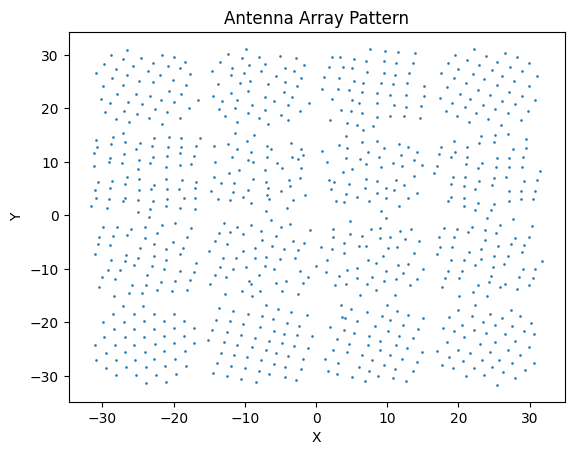

torch.Size([1, 2048])
0.5
True Cost: tensor([0.6511], device='cuda:0')


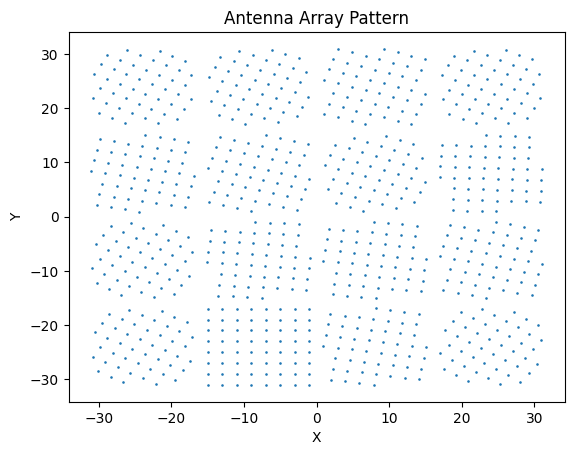

Pred Cost: tensor([[0.6181]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8607614040374756
New Pred: tensor([[-1.0127]], device='cuda:0', grad_fn=<AddmmBackward0>)


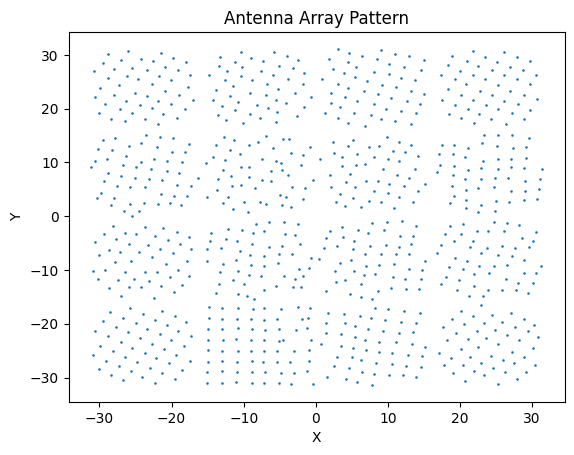

torch.Size([1, 2048])
0.6637407541275024
True Cost: tensor([-1.5739], device='cuda:0')


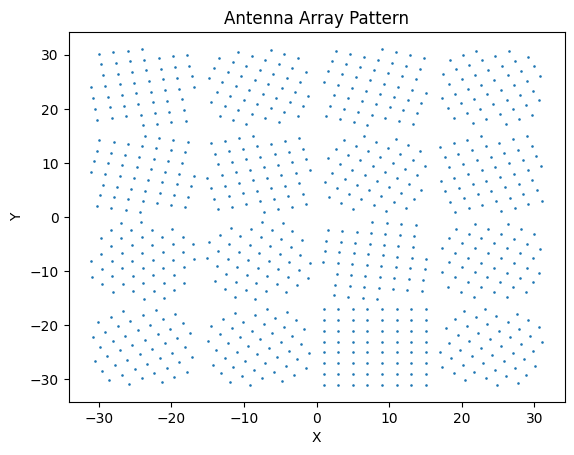

Pred Cost: tensor([[-1.7768]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8747233152389526
New Pred: tensor([[-2.4559]], device='cuda:0', grad_fn=<AddmmBackward0>)


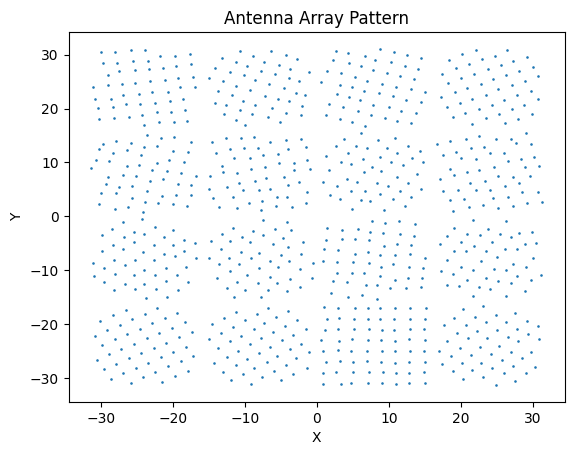

torch.Size([1, 2048])
1.0040202140808105
True Cost: tensor([-0.0241], device='cuda:0')


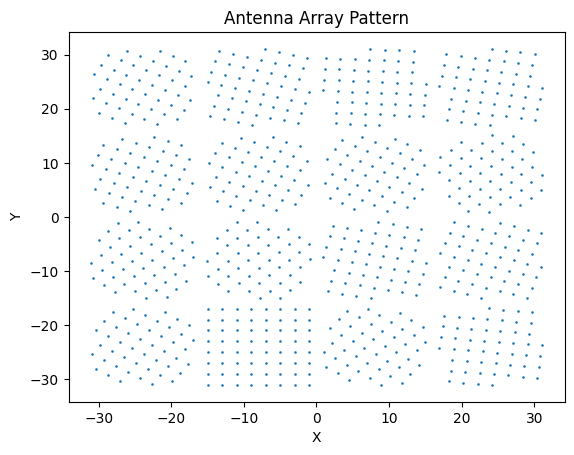

Pred Cost: tensor([[0.1075]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.9026765823364258
New Pred: tensor([[-1.8085]], device='cuda:0', grad_fn=<AddmmBackward0>)


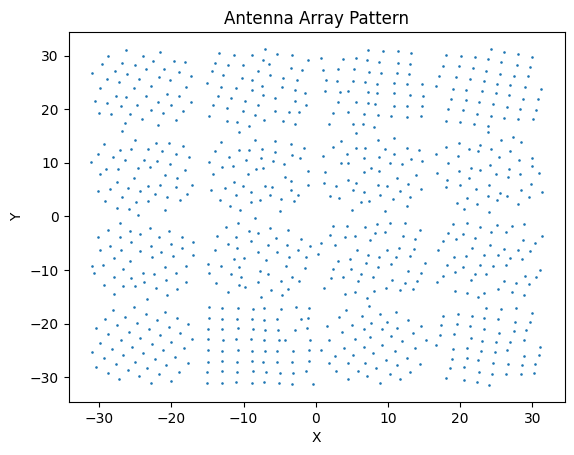

torch.Size([1, 2048])
0.845123291015625
True Cost: tensor([-0.0313], device='cuda:0')


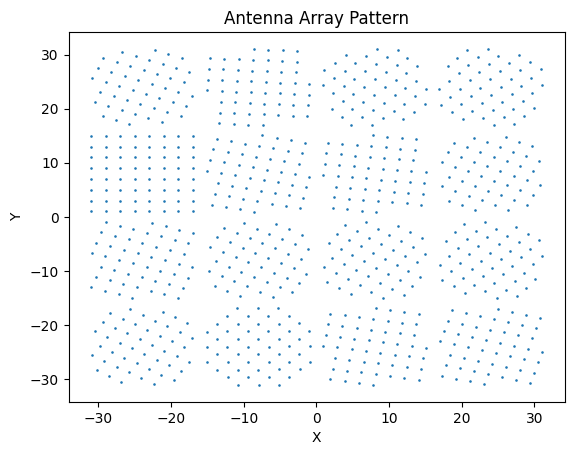

Pred Cost: tensor([[-0.0969]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8647997379302979
Early stopped
New Pred: tensor([[-2.3718]], device='cuda:0', grad_fn=<AddmmBackward0>)


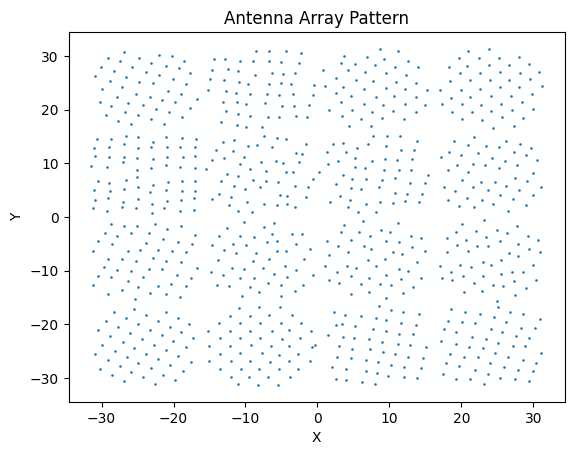

torch.Size([1, 2048])
0.50006103515625
True Cost: tensor([-0.8817], device='cuda:0')


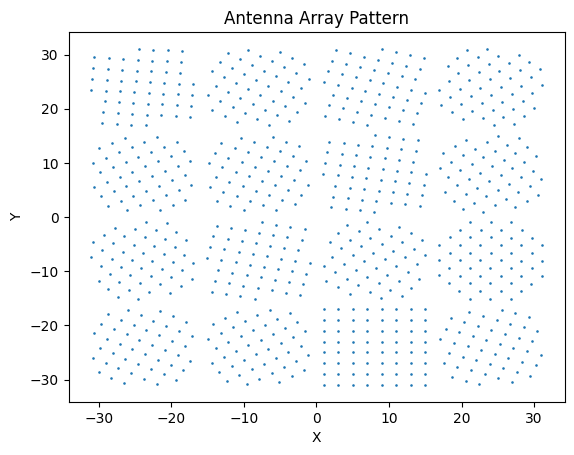

Pred Cost: tensor([[-0.8398]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.9943290948867798
New Pred: tensor([[-1.6545]], device='cuda:0', grad_fn=<AddmmBackward0>)


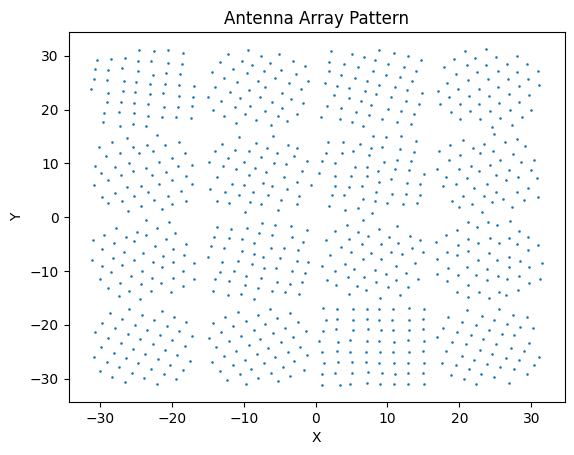

torch.Size([1, 2048])
1.0344411134719849
True Cost: tensor([-0.3075], device='cuda:0')


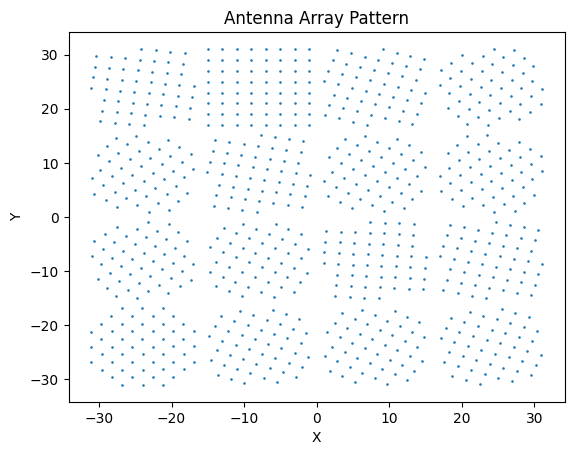

Pred Cost: tensor([[-0.4085]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.885080337524414
New Pred: tensor([[-1.9730]], device='cuda:0', grad_fn=<AddmmBackward0>)


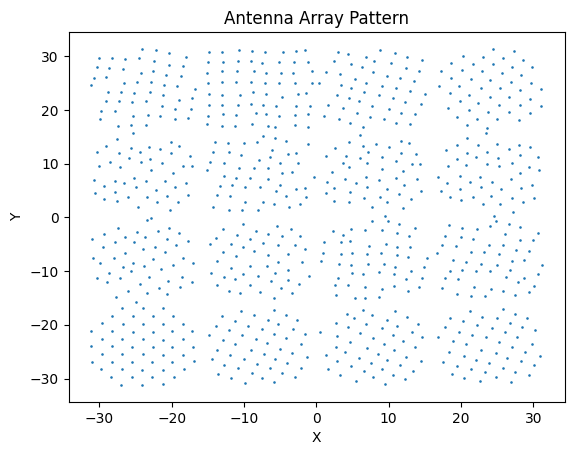

torch.Size([1, 2048])
0.6002929210662842
True Cost: tensor([-1.1025], device='cuda:0')


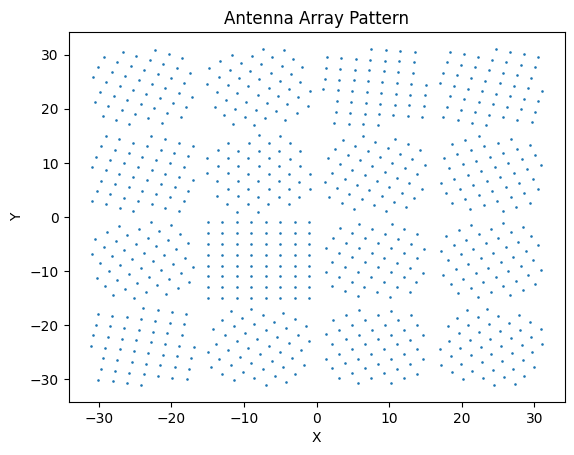

Pred Cost: tensor([[-1.0575]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.9109508991241455
New Pred: tensor([[-1.5809]], device='cuda:0', grad_fn=<AddmmBackward0>)


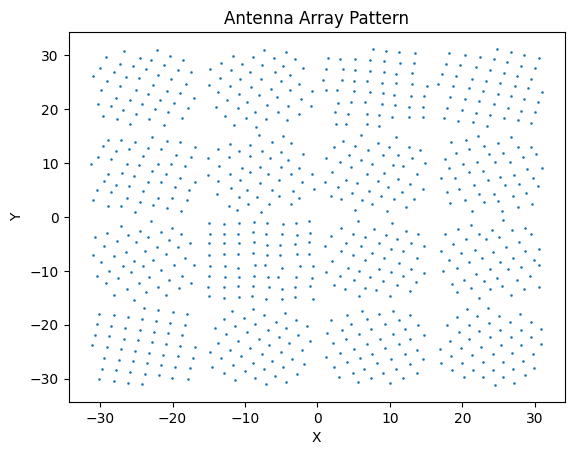

torch.Size([1, 2048])
1.2723946571350098
True Cost: tensor([1.1346], device='cuda:0')


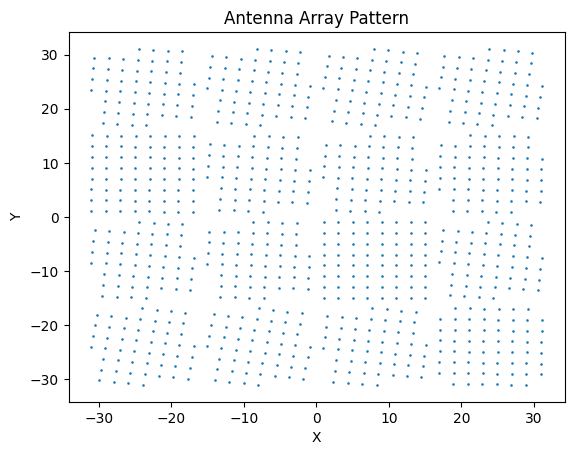

Pred Cost: tensor([[1.1297]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8580286502838135
New Pred: tensor([[1.1189]], device='cuda:0', grad_fn=<AddmmBackward0>)


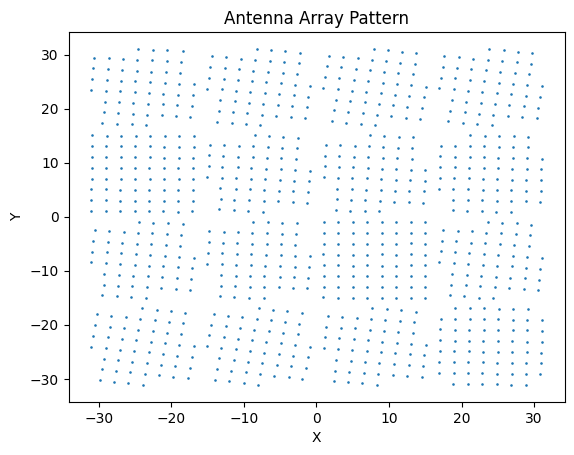

torch.Size([1, 2048])
1.8062087297439575
True Cost: tensor([1.1310], device='cuda:0')


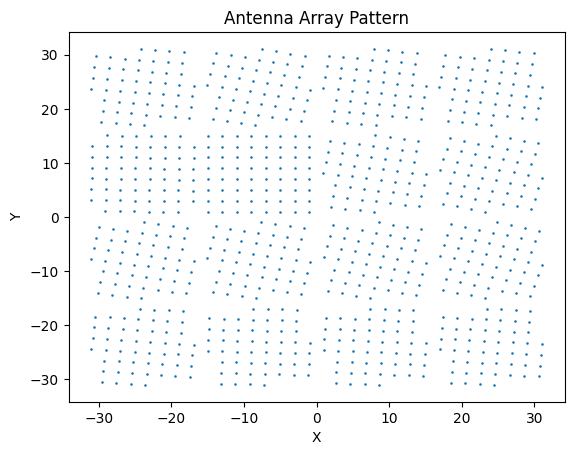

Pred Cost: tensor([[1.1210]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.860334873199463
New Pred: tensor([[1.1103]], device='cuda:0', grad_fn=<AddmmBackward0>)


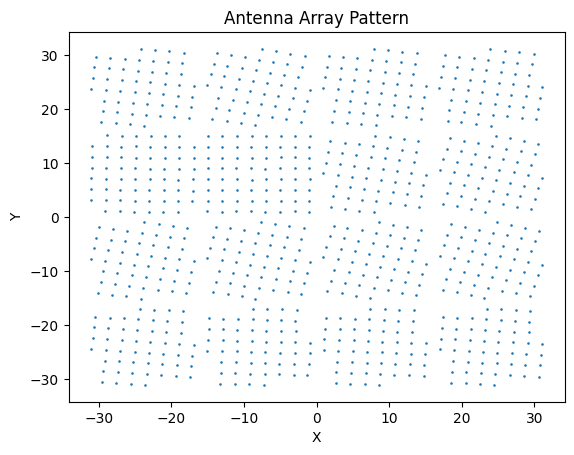

torch.Size([1, 2048])
1.7918578386306763
True Cost: tensor([1.0866], device='cuda:0')


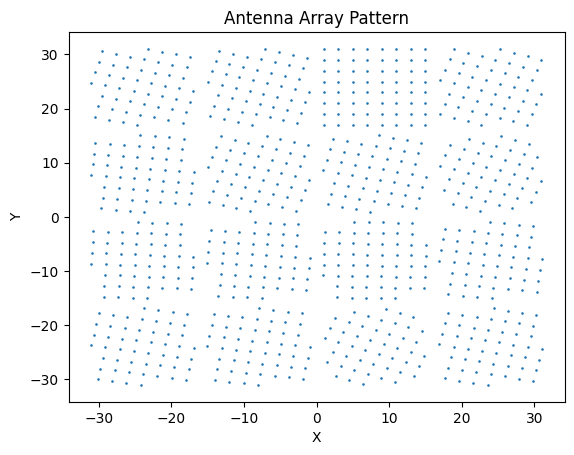

Pred Cost: tensor([[1.0668]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8860676288604736
New Pred: tensor([[1.0561]], device='cuda:0', grad_fn=<AddmmBackward0>)


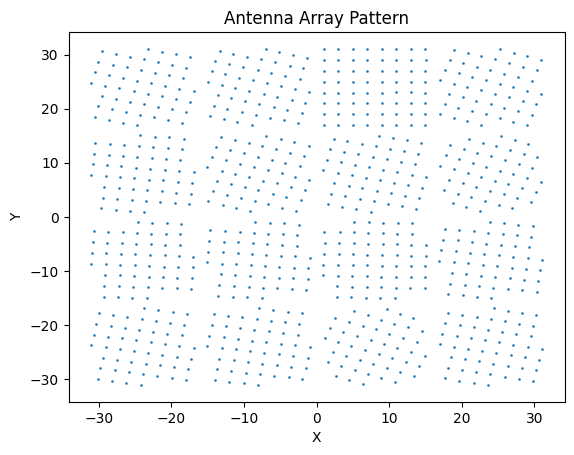

torch.Size([1, 2048])
1.80624258518219
True Cost: tensor([0.8234], device='cuda:0')


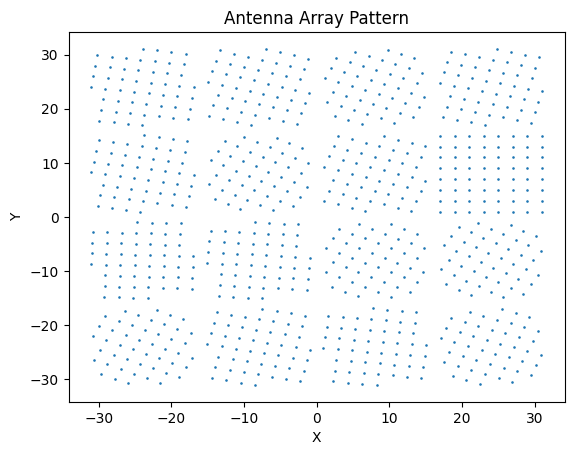

Pred Cost: tensor([[0.7892]], device='cuda:0', grad_fn=<AddmmBackward0>)
1.8845783472061157
New Pred: tensor([[0.3821]], device='cuda:0', grad_fn=<AddmmBackward0>)


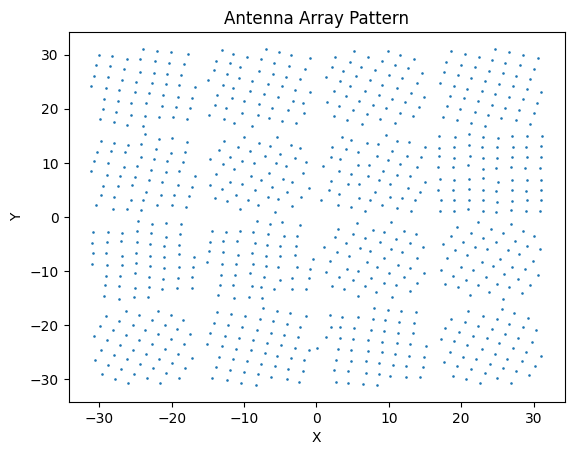

torch.Size([1, 2048])
1.0924098491668701


In [241]:
train_loader = DataLoader(AntDataset('data/large/scaled_cost/YZ_Large_70_Cost_Scaled.npz'))
i = 0
for inp, out in train_loader:
    if i == 20:
        break

    given_shapes_True_cost.append(out.item())
    given_shapes[i, :] = inp.flatten().numpy()
    inp, out = inp.to(device), out.to(device)

    inp_copy = inp.clone()
    inp_copy.requires_grad_()
    print(f'True Cost: {out}')
    show_arrays(inp)
    inp.requires_grad_()
    pred = model(inp)
    given_shapes_pred_cost.append(pred.item())
    print(f'Pred Cost: {pred}')
    print(calculate_min_distance(inp))
    optimized_inp = gradient_wrt_input(model, inp_copy,1e-2,1e-12, 10000)
    optimized_shapes[i, :] = optimized_inp.detach().flatten().cpu().numpy()
    optimized_inp.to(device)
    new_pred = model(optimized_inp)
    optimized_shapes_pred_cost.append(new_pred.item())
    print(f'New Pred: {new_pred}')
    show_arrays(optimized_inp)
    print(optimized_inp.shape)
    print(calculate_min_distance(optimized_inp))
    i += 1

In [233]:
columns = [f'y{i + 1}' for i in range(1024)] + [f'z{i + 1}' for i in range(1024)]
given_shapes_df = pd.DataFrame(given_shapes, columns=columns)
optimized_shapes_df = pd.DataFrame(optimized_shapes, columns=columns)

In [235]:
given_shapes_df.to_csv('given_shapes.csv', index = False)
optimized_shapes_df.to_csv('optimized_shapes.csv', index = False)

In [237]:
given_shapes_true_cost_df = pd.DataFrame({'True Cost': given_shapes_True_cost})
given_shapes_pred_cost_df = pd.DataFrame({'Predicted Cost': given_shapes_pred_cost})
optimized_shapes_pred_cost_df = pd.DataFrame({'Optimized Predicted Cost': optimized_shapes_pred_cost})

In [239]:
given_shapes_pred_cost_df.to_csv('given_shapes_pred_cost.csv', index = False)
given_shapes_true_cost_df.to_csv('given_shapes_true_cost.csv', index = False)
optimized_shapes_pred_cost_df.to_csv('optimized_shapes_pred_cost.csv', index = False)

In [4]:
data = np.load('data/large/large_YZant.npz')['arr_0']

array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        , -0.93040047])